In [ ]:
#Observable Trends
    # The NH temp vs latitude plot shows that as you move north from the equator, the temp will decrease.
    # The SH temp vs latitude plot shows that as you move south from the equator, the temp will decrease.
    # The slope of temperture decrease is much steeper when looking at the NH data vs the SH data.
    # Couldines is pretty consistent across all latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

In [2]:
# Import API key
from weather_key import weather_api_key_2

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



In [6]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key_2}&units={units}&q="

In [9]:
test_query_url = query_url + cities[1]

In [10]:
response_test = requests.get(test_query_url).json()
response_test


{'coord': {'lon': 39.6401, 'lat': -0.4536},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 26.55,
  'feels_like': 27.16,
  'temp_min': 26.55,
  'temp_max': 26.55,
  'pressure': 1013,
  'humidity': 63,
  'sea_level': 1013,
  'grnd_level': 997},
 'visibility': 10000,
 'wind': {'speed': 3.7, 'deg': 72},
 'clouds': {'all': 68},
 'dt': 1613022100,
 'sys': {'country': 'KE', 'sunrise': 1613014313, 'sunset': 1613057978},
 'timezone': 10800,
 'id': 197745,
 'name': 'Garissa',
 'cod': 200}

In [11]:
# testing on 1 city
temp_test = []
lon_test = []
lat_test = []
humidity_test = []
cloud_test = []
wind_test = []
id_test = []
cities_final = []
except_final = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp_test.append(response['main']['temp'])
        lon_test.append(response['coord']['lon'])
        lat_test.append(response['coord']['lat'])
        humidity_test.append(response['main']['humidity'])
        cloud_test.append(response['clouds']['all'])
        wind_test.append(response['wind']['speed'])
        id_test.append(response['id'])
        cities_final.append(city)
        if len(temp_test) > 13:
            break
    except:
        # Append null values
        print(f"{city} not found")
        except_final.append(city)
        if len(except_final) > 5:
            break
        pass
    

In [12]:
# testing on 1 city
weather_dict_test = {
    "city" : cities_final,
    "id" : id_test,
    "temp": temp_test,
    "long" : lon_test,
    "lat" : lat_test,
    "humidity": humidity_test,
    "cloudiness": cloud_test,
    "wind speed" : wind_test
    
}
weather_dict_test

{'city': ['carnarvon',
  'garissa',
  'saint-philippe',
  'bluff',
  'sao joao da barra',
  'barentin',
  'velikiy ustyug',
  'bengkulu',
  'hilo',
  'atuona',
  'kodiak',
  'agropoli',
  'busselton',
  'rio grande'],
 'id': [2074865,
  197745,
  935215,
  2206939,
  3448903,
  3034951,
  476062,
  1649150,
  5855927,
  4020109,
  5866583,
  6541176,
  2075265,
  3451138],
 'temp': [27,
  26.55,
  28,
  11.52,
  22.48,
  -5.12,
  -23.67,
  29.35,
  19.58,
  25.77,
  3,
  8.5,
  19.44,
  22.78],
 'long': [113.6333,
  39.6401,
  55.7679,
  168.3333,
  -41.0511,
  0.9552,
  46.3106,
  102.2655,
  -155.09,
  -139.0333,
  -152.4072,
  14.9966,
  115.3333,
  -52.0986],
 'lat': [-24.8667,
  -0.4536,
  -21.3585,
  -46.6,
  -21.6403,
  49.5453,
  60.7644,
  -3.8004,
  19.7297,
  -9.8,
  57.79,
  40.3469,
  -33.65,
  -32.035],
 'humidity': [65, 63, 58, 81, 91, 86, 88, 63, 68, 80, 70, 96, 60, 91],
 'cloudiness': [0, 68, 75, 100, 78, 0, 75, 10, 20, 1, 90, 72, 66, 98],
 'wind speed': [9.77,
  3.7,


In [13]:
#required data points for compare
    # temp
    # humidity
    # cloudiness
    # wind speed

# set up lists to hold reponse info
temp = []
lon = []
lat = []
humidity = []
cloud = []
wind = []
id_num = []
cities_final = []
not_found = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    # adding try except for cities not on open weather
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        id_num.append(response['id'])
        id_line = response["id"]
        cities_final.append(city)
        print(f"Response complete for {city} | {id_line}")
    except:
        # Append null values
        print(f"{city} not found")
        not_found.append(city)
        pass


    

Response complete for carnarvon | 2074865
Response complete for garissa | 197745
Response complete for saint-philippe | 935215
Response complete for bluff | 2206939
Response complete for sao joao da barra | 3448903
Response complete for barentin | 3034951
Response complete for velikiy ustyug | 476062
Response complete for bengkulu | 1649150
Response complete for hilo | 5855927
Response complete for atuona | 4020109
Response complete for kodiak | 5866583
Response complete for agropoli | 6541176
Response complete for busselton | 2075265
Response complete for rio grande | 3451138
Response complete for karratha | 6620339
barentsburg not found
Response complete for victoria | 1819729
Response complete for uberaba | 3445839
Response complete for lompoc | 5367788
Response complete for punta arenas | 3874787
Response complete for kapaa | 5848280
Response complete for mangrol | 1263752
Response complete for jacareacanga | 3397763
Response complete for barcelos | 2742416
Response complete for po

Response complete for bambous virieux | 1106677
Response complete for tual | 1623197
Response complete for seddon | 7281807
Response complete for okato | 2185763
Response complete for luena | 3347719
Response complete for nishihara | 1855342
Response complete for bloomingdale | 4148207
Response complete for meulaboh | 1214488
Response complete for port hardy | 6111862
Response complete for grootfontein | 3357114
Response complete for robertsport | 2274275
Response complete for pocoes | 3453337
Response complete for vao | 2137773
Response complete for phalodi | 1259813
Response complete for mao | 2514301
Response complete for kilakarai | 1252646
Response complete for iskateley | 866062
Response complete for laguna | 5364271
Response complete for zyryanka | 2119283
Response complete for baculin | 1729469
Response complete for dunhua | 2037534
Response complete for bima | 1648759
Response complete for moerai | 4034188
Response complete for nome | 5870133
Response complete for sao filipe |

karakendzha not found
Response complete for kimberley | 990930
Response complete for nador | 2541479
Response complete for kudahuvadhoo | 1337607
Response complete for voh | 2137748
Response complete for mahibadhoo | 1337605
Response complete for arlit | 2447513
Response complete for kingussie | 2645409
Response complete for nefteyugansk | 1497917
Response complete for ashland | 5146062
Response complete for takoradi | 2294915
Response complete for teya | 1489656
Response complete for mersing | 1732826
Response complete for pichayevo | 509649
Response complete for lashio | 1314759
Response complete for floriano | 3399506
Response complete for espinosa | 3463939
Response complete for okha | 2122614
Response complete for sol-iletsk | 491019
Response complete for sussex | 5105168
Response complete for cabra | 2520645
Response complete for alora | 2521840
Response complete for beringovskiy | 2126710
burkhala not found
Response complete for los alamos | 5476825
Response complete for ilhabel

In [14]:
# checking the number of cities after hitting the api
num_cities_pulled = len(temp)
num_cities_pulled

565

In [15]:
# creating data frame for the weather data
weather_dict = {
    "id" : id_num,
    "city" : cities_final,
    "temp": temp,
    "long" : lon,
    "lat" : lat,
    "humidity": humidity,
    "cloudiness": cloud,
    "wind speed" : wind}

weather_data = pd.DataFrame(weather_dict)
weather_data

,id,city,temp,long,lat,humidity,cloudiness,wind speed
0,2074865,carnarvon,27.00,113.6333,-24.8667,65,0,9.77
1,197745,garissa,26.55,39.6401,-0.4536,63,68,3.70
2,935215,saint-philippe,28.00,55.7679,-21.3585,58,75,3.60
3,2206939,bluff,11.52,168.3333,-46.6000,81,100,11.35
4,3448903,sao joao da barra,22.48,-41.0511,-21.6403,91,78,1.76
...,...,...,...,...,...,...,...,...
560,4362001,mayo,0.73,-76.5119,38.8876,96,90,3.09
561,3174050,mantua,3.64,10.7833,45.1667,96,0,1.34
562,1260222,parvatipuram,32.57,83.4333,18.7833,20,27,1.15
563,6111744,port elgin,-10.60,-64.0868,46.0487,67,48,7.20


In [16]:
# exporting data to csv
weather_data.to_csv(output_data_file)

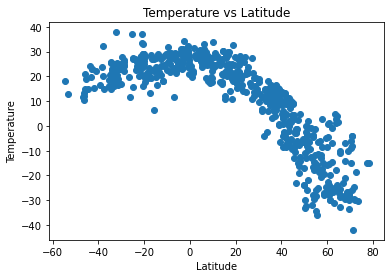

This chart is comparing the temperature vs the latitude of a random sample of 566 cities across the globe.
We want to see if the temperature is higher when the latitude apporaches 0.


In [17]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Temperature vs Latitude")
plt.show()
print("This chart is comparing the temperature vs the latitude of a random sample of 566 cities across the globe.")
print("We want to see if the temperature is higher when the latitude apporaches 0.")

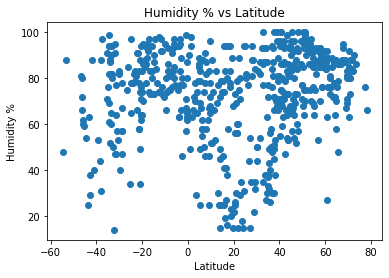

This chart is comparing the humidity % vs the latitude of a random sample of 566 cities across the globe.
We want to see if there is correlation between humidity & latitude.


In [18]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("Humidity % vs Latitude")
plt.show()
print("This chart is comparing the humidity % vs the latitude of a random sample of 566 cities across the globe.")
print("We want to see if there is correlation between humidity & latitude.")

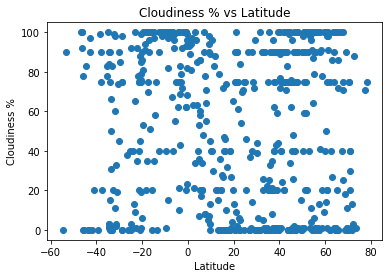

This chart is comparing the cloudiness % vs the latitude of a random sample of 566 cities across the globe.
We want to see if there is correlation between cloudiness % & latitude.


In [19]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = weather_data['lat']
y_values = weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Cloudiness % vs Latitude")
plt.show()
print("This chart is comparing the cloudiness % vs the latitude of a random sample of 566 cities across the globe.")
print("We want to see if there is correlation between cloudiness % & latitude.")

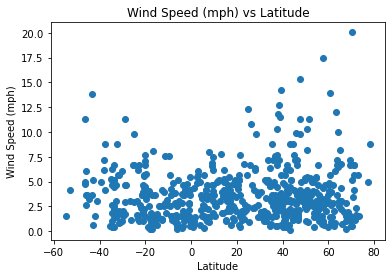

This chart is comparing the wind speed (mph) vs the latitude of a random sample of 566 cities across the globe.
We want to see if there is correlation between wind speed & latitude.


In [20]:
# Create a Scatter Plot for wind speed vs latitude
x_values = weather_data['lat']
y_values = weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed (mph) vs Latitude")
plt.show()
print("This chart is comparing the wind speed (mph) vs the latitude of a random sample of 566 cities across the globe.")
print("We want to see if there is correlation between wind speed & latitude.")

In [21]:
pd.to_numeric(weather_data["lat"])



0     -24.8667
1      -0.4536
2     -21.3585
3     -46.6000
4     -21.6403
        ...   
560    38.8876
561    45.1667
562    18.7833
563    46.0487
564    35.0113
Name: lat, Length: 565, dtype: float64

In [22]:
weather_data.dtypes

id              int64
city           object
temp          float64
long          float64
lat           float64
humidity        int64
cloudiness      int64
wind speed    float64
dtype: object

In [23]:
# creating data frame for the northern hemisphere using .loc to grab lats > 0
nh_weather_data = weather_data.loc[weather_data["lat"] > 0]
# creating data frame for the southern hemisphere using .loc to grab lats < 0
sh_weather_data = weather_data.loc[weather_data["lat"] < 0]
print(f"The sample has {len(nh_weather_data)} cities in the Northern Hemisphere")
print(f"The sample has {len(sh_weather_data)} cities in the Southern Hemisphere.")

The sample has 390 cities in the Northern Hemisphere
The sample has 175 cities in the Southern Hemisphere.


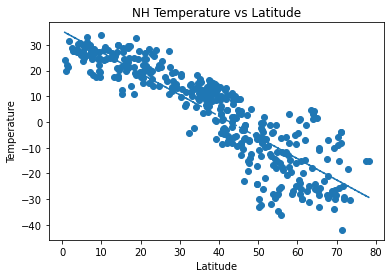

In [24]:
#Northern Hemisphere - Temp vs. Latitude Linear Regression

# Declaring variables
nh_lat = nh_weather_data["lat"]
nh_temp = nh_weather_data["temp"]

# Doing linear reg and fit line
lin_reg_nh_temp_lat = stats.linregress(nh_lat, nh_temp)
nh_temp_lat_fit = lin_reg_nh_temp_lat.slope * nh_lat + lin_reg_nh_temp_lat.intercept

# plotting
x_values = nh_lat
y_values = nh_temp
plt.scatter(x_values,y_values)
plt.plot(nh_lat,nh_temp_lat_fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("NH Temperature vs Latitude")
plt.show()


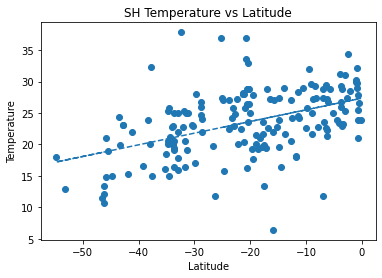

In [25]:
#Southern Hemisphere - Temp vs. Latitude Linear Regression

# Declaring variables
sh_lat = sh_weather_data["lat"]
sh_temp = sh_weather_data["temp"]

# Doing linear reg and fit line
lin_reg_sh_temp_lat = stats.linregress(sh_lat, sh_temp)
sh_temp_lat_fit = lin_reg_sh_temp_lat.slope * sh_lat + lin_reg_sh_temp_lat.intercept

# plotting
x_values = sh_lat
y_values = sh_temp
plt.scatter(x_values,y_values)
plt.plot(sh_lat,sh_temp_lat_fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("SH Temperature vs Latitude")
plt.show()

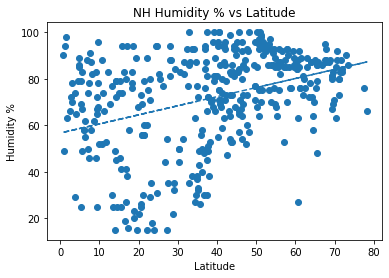

In [26]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Declaring variables
nh_hum = nh_weather_data["humidity"]

# Doing linear reg and fit line
lin_reg_nh_hum_lat = stats.linregress(nh_lat, nh_hum)
nh_hum_lat_fit = lin_reg_nh_hum_lat.slope * nh_lat + lin_reg_nh_hum_lat.intercept

# plotting
x_values = nh_lat
y_values = nh_hum
plt.scatter(x_values,y_values)
plt.plot(nh_lat,nh_hum_lat_fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("NH Humidity % vs Latitude")
plt.show()


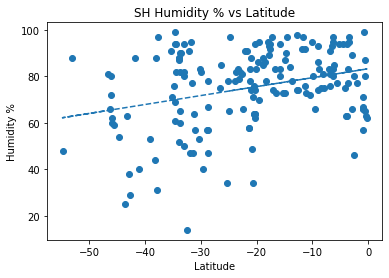

In [27]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Declaring variables
sh_hum = sh_weather_data["humidity"]

# Doing linear reg and fit line
lin_reg_sh_hum_lat = stats.linregress(sh_lat, sh_hum)
sh_hum_lat_fit = lin_reg_sh_hum_lat.slope * sh_lat + lin_reg_sh_hum_lat.intercept

# plotting
x_values = sh_lat
y_values = sh_hum
plt.scatter(x_values,y_values)
plt.plot(sh_lat,sh_hum_lat_fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("SH Humidity % vs Latitude")
plt.show()

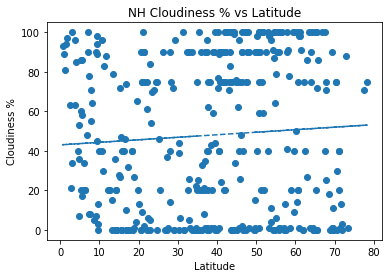

In [28]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Declaring variables
nh_cloud = nh_weather_data["cloudiness"]

# Doing linear reg and fit line
lin_reg_nh_cloud_lat = stats.linregress(nh_lat, nh_cloud)
nh_cloud_lat_fit = lin_reg_nh_cloud_lat.slope * nh_lat + lin_reg_nh_cloud_lat.intercept

# plotting
x_values = nh_lat
y_values = nh_cloud
plt.scatter(x_values,y_values)
plt.plot(nh_lat,nh_cloud_lat_fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("NH Cloudiness % vs Latitude")
plt.show()

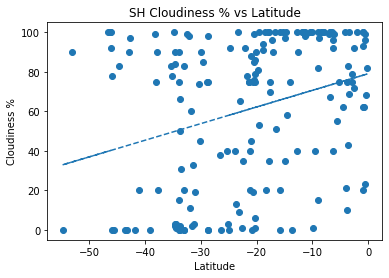

In [29]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Declaring variables
sh_cloud = sh_weather_data["cloudiness"]

# Doing linear reg and fit line
lin_reg_sh_cloud_lat = stats.linregress(sh_lat, sh_cloud)
sh_cloud_lat_fit = lin_reg_sh_cloud_lat.slope * sh_lat + lin_reg_sh_cloud_lat.intercept

# plotting
x_values = sh_lat
y_values = sh_cloud
plt.scatter(x_values,y_values)
plt.plot(sh_lat,sh_cloud_lat_fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("SH Cloudiness % vs Latitude")
plt.show()

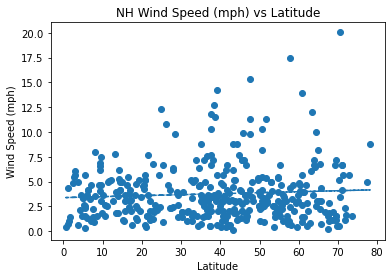

In [30]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# Declaring variables
nh_wind = nh_weather_data["wind speed"]

# Doing linear reg and fit line
lin_reg_nh_wind_lat = stats.linregress(nh_lat, nh_wind)
nh_wind_lat_fit = lin_reg_nh_wind_lat.slope * nh_lat + lin_reg_nh_wind_lat.intercept

# plotting
x_values = nh_lat
y_values = nh_wind
plt.scatter(x_values,y_values)
plt.plot(nh_lat,nh_wind_lat_fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("NH Wind Speed (mph) vs Latitude")
plt.show()


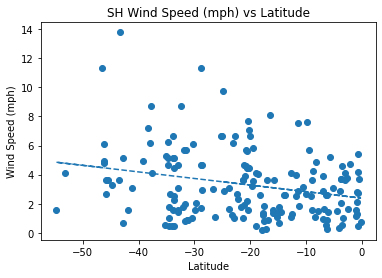

In [31]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# Declaring variables
sh_wind = sh_weather_data["wind speed"]

# Doing linear reg and fit line
lin_reg_sh_wind_lat = stats.linregress(sh_lat, sh_wind)
sh_wind_lat_fit = lin_reg_sh_wind_lat.slope * sh_lat + lin_reg_sh_wind_lat.intercept

# plotting
x_values = sh_lat
y_values = sh_wind
plt.scatter(x_values,y_values)
plt.plot(sh_lat,sh_wind_lat_fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("SH Wind Speed (mph) vs Latitude")
plt.show()